<a href="https://colab.research.google.com/github/chacha86/BigData3/blob/colab/k%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%EC%98%88%EC%A0%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 머신러닝 알고리즘. 
# KNN - 최근접 이웃 알고리즘

import pandas as pd

df = pd.read_csv('/content/Fish.csv')

# 지도 학습 -> 학습을 시킬 때 답을 제시
# 비지도 학습 -> 답X, 데이터들의 패턴을 통해 상관관계를 나타내는데 많이 이용

# 학습 데이터 (모의고사 문제)
# 정답 데이터 (모의고사 문제의 정답)
# 학습데이터와 정답데이터를 이용해 머신러닝 알고리즘을 훈련시킬 수 있다.

# 무게
weight = df['Weight']

# 수학적인 알고리즘 처리 -> 배열(넘파이)
# 머신러닝 알고리즘에는 배열로 넘겨준다.
weight.values

species = df['Species']

species.unique() # 물고기 종류 확인
df
# 마킹

# 내가 원하는 것.(분류 되기를 바라는 것.) -> target(정답: 1, 나머진 : 0)

# bream에다가 마킹하기
df['target'] = 0 # target 컬럼 만들기(초기값 0)

idx = df['Species'] == 'Bream' # 조건 인덱싱으로 Bream인 인덱스 찾기

# 판다스 인덱싱 -> loc, iloc
df.loc[0:10, 'Species' : 'Length1'] 

df.loc[idx, 'target'] = 1 # 판다스 인덱싱을 이용해 데이터 수정하기

# 학습데이터
idx2 = (df['Species'] == 'Bream') | (df['Species'] == 'Smelt')
df2 = df[idx2]
train_set = df2[['Weight', 'Length1']]

# 정답데이터 
target_set = df2['target']

# 배열로 변환
train_set = train_set.values
target_set = target_set.values


1.0

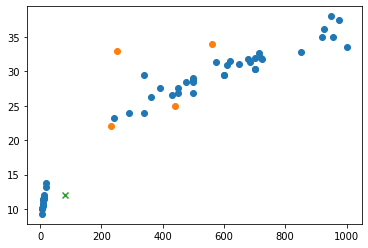

In [29]:
import matplotlib.pyplot as plt

# 산점도 그래프를 이용해 데이터의 현황을 시각적으로 파악
plt.scatter(train_set[:, 0], train_set[:, 1])
plt.scatter([230, 250, 440, 560], [22,33, 25, 34])
plt.scatter(80, 12, marker='x')


from sklearn.neighbors import KNeighborsClassifier # KNN 알고리즘 모델

kn = KNeighborsClassifier()

# 학습
kn.fit(train_set, target_set)

# 평가
kn.score(train_set, target_set) # 1.0 ==> 100%

# 예측
kn.predict([[80, 12]])

# 최근접 이웃
# 5개중에 더 많은 것을 정답이라고 예측(최근접 이웃의 개수는 설정할 수 있음.


import numpy as np

# 학습 데이터와 테스트 데이터가 동일하면 모델 학습 평가가 100이 나오게 되는데 이 100은 의미가 없음. 학습시킨 데이터와는 다른 데이터로 평가해야 유의미한 값이 나옴

train_data = train_set[:35,:]
test_data = train_set[35:, ]

train_target = target_set[:35]
test_target = target_set[35:]

kn.fit(train_data, train_target) 
kn.score(test_data, test_target)

# 이번엔 학습 평가 결과가 0이 나옴. 학습을 시킬 때 학습 데이터에 빙어에 대한 데이터가 단 하나도 존재하지 않기 때문. 학습 데이터를 마련할 때는 데이터가 골고루 분포되어 있어야 하므로
# 보통 데이터를 한번 섞어줌.

# 넘파이의 shuffle을 이용해 배열의 원소들을 섞을 수 있음. 이 때, 학습 데이터와 정답 데이터가 같은 위치로 섞여야 하기 때문에 두 배열데이터를 붙여서 하나의 배열로 
# 만든 후 섞어주어야 함

# 넘파이 합치기

target_arr = np.expand_dims(target_set, axis=1) # 넘파이에서 배열을 합치려면 대상 배열이 2차원부터 가능하기 때문에 1차원 배열인 정답데이터의 차원을 확장함. 각 정답 데이터가 행에 붙어야 하므로 확장 방향은 세로축
con_data = np.concatenate((train_set, target_arr), axis=1)
np.random.shuffle(con_data) 


# 배열 다시 나누기
rand_train_data = con_data[:35, :2]
rand_train_target = con_data[:35, 2 :]
rand_test_data = con_data[35:, :2]
rand_test_target = con_data[35:, 2 :]

# target 배열은 1차원 배열이어야 하므로 차원 축소
rand_train_target = np.squeeze(rand_train_target, axis=1)
rand_test_target = np.squeeze(rand_test_target, axis=1)

# 훈련 후 재평가
kn = kn.fit(rand_train_data, rand_train_target)
kn.score(rand_test_data, rand_test_target)




In [ ]:

# 넘파이 합치기


# train_set.shape
# train_set.ndim

# target_set.ndim
target_set = np.expand_dims(target_set, axis=1)
np.concatenate((train_set, target_set), axis=1)



# 모의고사 문제 집합, 함수
# 수능 문제 함수,